<a href="https://colab.research.google.com/github/lhoegler16/Biersortenerkennung/blob/main/Trainer_Biersortenerkenner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Trainer Biersortenerkennung

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

!pip install fastai --upgrade -q

     |████████████████████████████████| 194kB 13.6MB/s 
     |████████████████████████████████| 12.8MB 244kB/s 
     |████████████████████████████████| 776.8MB 23kB/s 
     |████████████████████████████████| 61kB 9.0MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.


In [3]:
from fastai.vision.all import*
from fastai.vision.widgets import*

In [4]:
#download from qdrive

!cp drive/MyDrive/Biersortenerkenner/Biersortenerkenner_simple.tar.gz ./
!mkdir /content/images
!tar -xf /content/Biersortenerkenner_simple.tar.gz -C /content/images/

In [5]:
path = Path('images')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [6]:
beers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(448,ResizeMethod.Pad,pad_mode='zeros'))

beer_dataloader = beers.dataloaders(path)

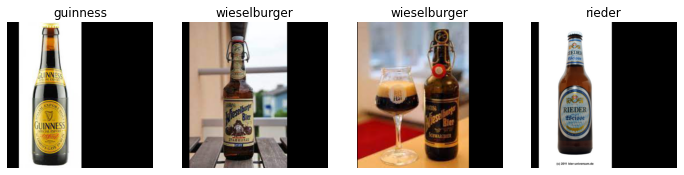

In [7]:
beer_dataloader.show_batch(max_n = 4, nrows= 1)

In [8]:
learner = cnn_learner(beer_dataloader,resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [10]:
learner.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,0.082541,0.187254,0.054795,00:10


epoch,train_loss,valid_loss,error_rate,time
0,0.048701,0.170883,0.061644,00:13
1,0.039613,0.128157,0.041096,00:14
2,0.029268,0.101727,0.020548,00:14
3,0.028015,0.075329,0.020548,00:13
4,0.024363,0.090615,0.041096,00:13
5,0.020922,0.086976,0.027397,00:13
6,0.017630,0.096494,0.047945,00:13
7,0.014566,0.134019,0.047945,00:13
8,0.012688,0.093926,0.027397,00:13
9,0.010605,0.097408,0.034247,00:13


#Confusion Matrix, Top Losses und Cleaner

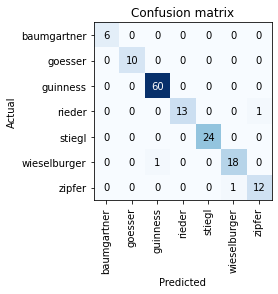

In [11]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()



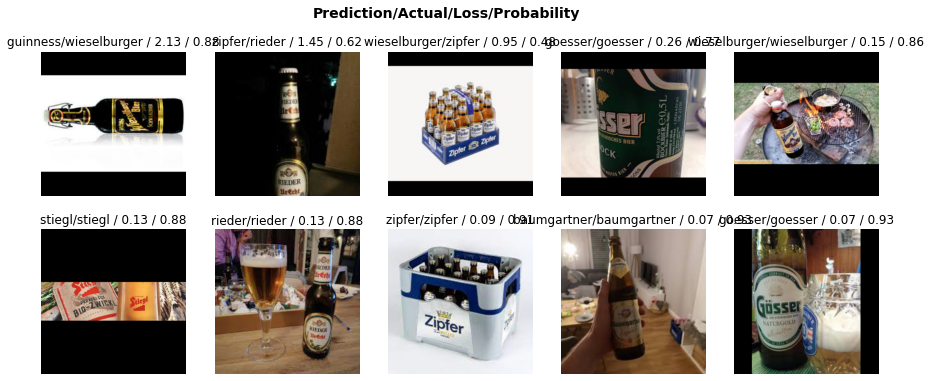

In [19]:
interp.plot_top_losses(10,nrows=2)

In [18]:
cleaner = ImageClassifierCleaner(learner)
cleaner

In [ ]:
for idx in cleaner.delete():
  cleaner.fns[idx].unlink()

for idx,cat in cleaner.change():
  shutil.move(str(cleaner.fns[idx]), path/cat)

In [13]:
learner.export('biersorten_classifier_simple.pkl')

#copy learner on gdrive
!cp /content/biersorten_classifier_simple.pkl /content/drive/MyDrive/Biersortenerkenner/biersorten_classifier_simple.pkl

In [14]:
#copy import learner from gdrive
!cp drive/MyDrive/Biersortenerkenner/biersorten_classifier_simple.pkl ./

path = Path();
inference = load_learner(path/'biersorten_classifier_simple.pkl')

In [18]:
inference.predict('baumgartner_test_02.jpg')

('rieder',
 tensor(3),
 tensor([1.2859e-01, 2.0336e-03, 7.1234e-06, 8.5832e-01, 1.0975e-02, 7.1860e-05,
         6.2116e-06]))